In [15]:
import os
import csv
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn
import matplotlib.image as mpimg
from sklearn.utils import shuffle

data_folder = './data3'
samples = []
with open(data_folder + '/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

# Remove head line
samples = samples[1:]

train_samples, validation_samples = train_test_split(samples, test_size=0.2)

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        samples = shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                source_path = data_folder + '/IMG/'+batch_sample[0].split('/')[-1]
                center_image = mpimg.imread(source_path)
                center_angle = float(batch_sample[3])
                
                # Randomly flipping the image to augment data
                if np.random.random_sample() >= 0.5:
                    center_image = np.fliplr(center_image)
                    center_angle = -center_angle
                
                images.append(center_image)
                angles.append(center_angle)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield shuffle(X_train, y_train)

In [16]:
res = generator(train_samples)

In [17]:
x, label = res.__next__()
print(x.shape, label.shape)

(32, 160, 320, 3) (32,)


In [12]:
import csv
import numpy as np
import pickle
import matplotlib.image as mpimg
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
folders = ['./data2']
lines = []
for folder in folders:
    with open(folder + '/driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)

len(lines)

7504

In [27]:
measurements = []
for line in lines[1:]:
    measurement = float(line[3])
    measurements.append(measurement)
    
y_train = np.array(measurements)

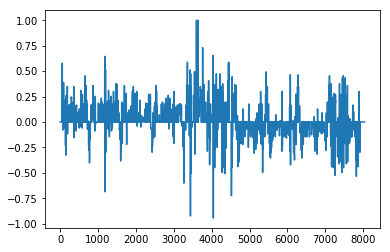

In [21]:
plt.plot(y_train)
plt.show()

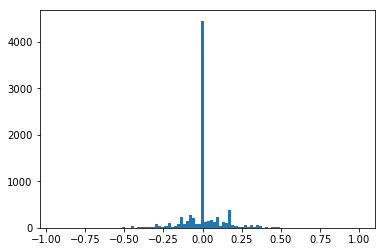

In [25]:
plt.hist(y_train, bins=100)
plt.show()

In [7]:
images = []
measurements = []
for line in lines:
    source_path = line[0]
    image = mpimg.imread(source_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)
    
    # Augment data by flipping the images
    image_flipped = np.fliplr(image)
    measurement_flipped = -measurement
    
    images.append(image_flipped)
    measurements.append(measurement_flipped)

In [8]:
X_train = np.array(images)
y_train = np.array(measurements)

In [5]:
X_train.shape

(22446, 160, 320, 3)

In [6]:
y_train.shape

(22446,)

In [16]:
pickle.dump((X_train, y_train), open( "train.p", "wb" ) )

In [4]:
X_train, y_train = pickle.load( open( "train.p", "rb" ) )

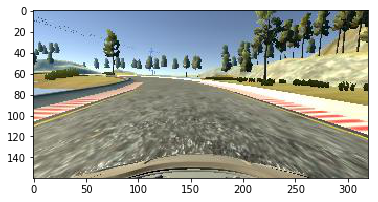

In [21]:
number = 1000
img = X_train[number,:]
plt.imshow(img)

In [22]:
img.shape

(160, 320, 3)

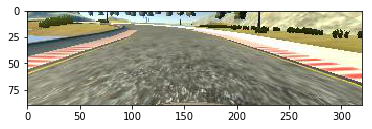

In [24]:
img_crop = img[50:140,:,:]
plt.imshow(img_crop)